<a href="https://colab.research.google.com/github/tisjayy/breastcancerclassification/blob/main/breast_cancer_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
%pip install pandas==2.2.2
%pip install numpy==1.26.4
%pip install matplotlib==3.8.0
%pip install scikit-learn==1.5.0
%pip install torch==2.3.1
%pip install ucimlrepo==0.0.7

  Using cached scikit_learn-1.5.0-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (11 kB)
Using cached scikit_learn-1.5.0-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (13.3 MB)
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.6.1
    Uninstalling scikit-learn-1.6.1:
      Successfully uninstalled scikit-learn-1.6.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
umap-learn 0.5.9.post2 requires scikit-learn>=1.6, but you have scikit-learn 1.5.0 which is incompatible.
  Using cached torch-2.3.1-cp311-cp311-manylinux1_x86_64.whl.metadata (26 kB)
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-many

The Breast Cancer Wisconsin (Diagnostic) dataset is a classic dataset used for classification tasks. It contains 569 samples of breast cancer cells, each with 30 features. The dataset is divided into two classes: benign and malignant. The goal is to classify the breast cancer cells into one of the two classes.

In [3]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
breast_cancer_wisconsin_diagnostic = fetch_ucirepo(id=17)

# data (as pandas dataframes)
X = breast_cancer_wisconsin_diagnostic.data.features
y = breast_cancer_wisconsin_diagnostic.data.targets

# print the first few rows of the data
display(X.head())

# print the first few rows of the target
display(y.head())

,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,symmetry1,fractal_dimension1,...,radius3,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


,Diagnosis
0,M
1,M
2,M
3,M
4,M


In [4]:
display(f'X shape: {X.shape}')
display(f'y shape: {y.shape}')

'X shape: (569, 30)'

'y shape: (569, 1)'

In [5]:
display(y['Diagnosis'].value_counts())

,count
Diagnosis,
B,357
M,212


because the dataset is imbalanced, lets randomly choose 200 samples of M and B

In [6]:
import pandas as pd
data = pd.concat([X, y], axis=1)
data_M = data[data['Diagnosis'] == 'M']
data_B = data[data['Diagnosis'] == 'B']
data_M = data_M.sample(n=200, random_state=42)
data_B = data_B.sample(n=200, random_state=42)
balanced_data = pd.concat([data_M, data_B])
display(balanced_data['Diagnosis'].value_counts())

,count
Diagnosis,
M,200
B,200


In [7]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import torch

X = balanced_data.drop('Diagnosis', axis=1)
y = balanced_data['Diagnosis']

# Split the data into training and testing sets
y = y.map({'M': 1, 'B': 0})


In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [17]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import torch
from torch.utils.data import TensorDataset, DataLoader

# Convert the data to PyTorch tensors
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_train = torch.tensor(X_train, dtype=torch.float32)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_train = torch.tensor(y_train.values, dtype=torch.long) # Convert to long
y_test = torch.tensor(y_test.values, dtype=torch.long)   # Convert to long
train_dataset = TensorDataset(X_train, y_train)
test_dataset = TensorDataset(X_test, y_test)
train_loader = DataLoader(train_dataset, batch_size=2, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=2, shuffle=False)

TypeError: 'builtin_function_or_method' object cannot be interpreted as an integer

In [11]:
import torch.nn as nn

class ClassificationNet(nn.Module):
    def __init__(self, input_units=30, hidden_units=64, output_units=2):
        super(ClassificationNet, self).__init__()
        self.fc1 = nn.Linear(input_units, hidden_units)
        self.fc2 = nn.Linear(hidden_units, output_units)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Instantiate the model
model = ClassificationNet(input_units=30, hidden_units=64, output_units=2)
print(model)

ClassificationNet(
  (fc1): Linear(in_features=30, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=2, bias=True)
)


In [12]:
import torch.optim as optim

# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)


In [18]:
epochs = 10
train_losses = []
test_losses = []

for epoch in range(epochs):
    # Training phase
    model.train()
    running_loss = 0.0
    for X_batch, y_batch in train_loader:
        optimizer.zero_grad()
        outputs = model(X_batch)
        loss = criterion(outputs, y_batch.long())  # Explicitly cast y_batch to long
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

    train_loss = running_loss / len(train_loader)
    train_losses.append(train_loss)

    # Evaluation phase on test set
    model.eval()
    test_loss = 0.0
    with torch.no_grad():
        for X_batch, y_batch in test_loader:
            test_outputs = model(X_batch)
            loss = criterion(test_outputs, y_batch.long()) # Explicitly cast y_batch to long
            test_loss += loss.item()

    test_loss /= len(test_loader)
    test_losses.append(test_loss)

    print(f'Epoch [{epoch + 1}/{epochs}], Train Loss: {train_loss:.4f}, Test Loss: {test_loss:.4f}')

Epoch [1/10], Train Loss: 0.3249, Test Loss: 0.1485
Epoch [2/10], Train Loss: 0.1379, Test Loss: 0.0883
Epoch [3/10], Train Loss: 0.1002, Test Loss: 0.0698
Epoch [4/10], Train Loss: 0.0870, Test Loss: 0.0740
Epoch [5/10], Train Loss: 0.0787, Test Loss: 0.0616
Epoch [6/10], Train Loss: 0.0720, Test Loss: 0.0650
Epoch [7/10], Train Loss: 0.0671, Test Loss: 0.0609
Epoch [8/10], Train Loss: 0.0596, Test Loss: 0.0618
Epoch [9/10], Train Loss: 0.0564, Test Loss: 0.0623
Epoch [10/10], Train Loss: 0.0528, Test Loss: 0.0688


Now that the model is trained, let's evaluate its performance on the test set and visualize the training and test losses.

In [19]:
from sklearn.metrics import accuracy_score, classification_report

model.eval()
y_pred = []
y_true = []

with torch.no_grad():
    for X_batch, y_batch in test_loader:
        outputs = model(X_batch)
        _, predicted = torch.max(outputs.data, 1)
        y_pred.extend(predicted.tolist())
        y_true.extend(y_batch.tolist())

accuracy = accuracy_score(y_true, y_pred)
print(f'Accuracy on the test set: {accuracy:.4f}')
print(classification_report(y_true, y_pred))

Accuracy on the test set: 0.9750
              precision    recall  f1-score   support

           0       0.95      1.00      0.97        36
           1       1.00      0.95      0.98        44

    accuracy                           0.97        80
   macro avg       0.97      0.98      0.97        80
weighted avg       0.98      0.97      0.98        80



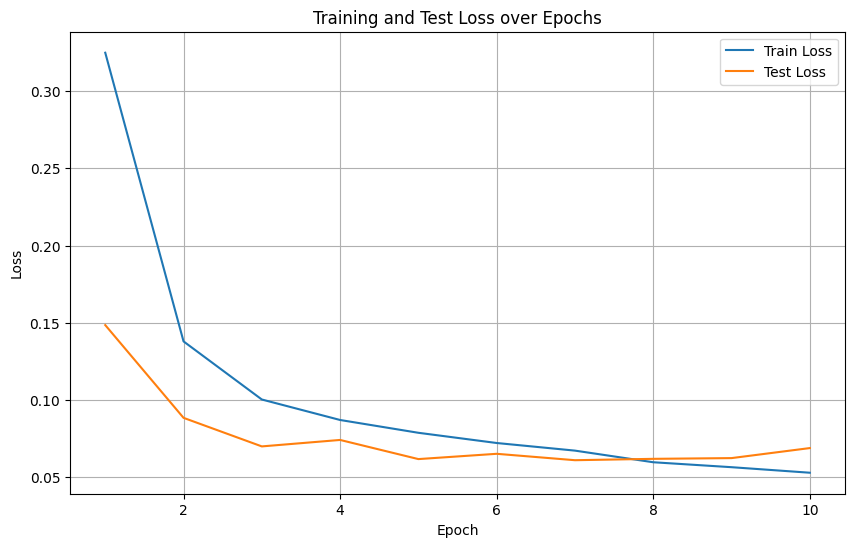

In [20]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(range(1, epochs + 1), train_losses, label='Train Loss')
plt.plot(range(1, epochs + 1), test_losses, label='Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Test Loss over Epochs')
plt.legend()
plt.grid(True)
plt.show()